In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain
import locale

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Important or FDA validation: **Patient Population Description for FDA Validation Datase**

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
59013,00014608_000.png,No Finding,0,14608,67,M,PA,2048,2500,0.168,0.168,NaN
4125,00001117_000.png,No Finding,0,1117,84,M,PA,2992,2991,0.143,0.143,NaN
55814,00013966_010.png,Consolidation,10,13966,74,M,AP,2500,2048,0.168,0.168,NaN


In [3]:
# PREPARING DATA

# Gender

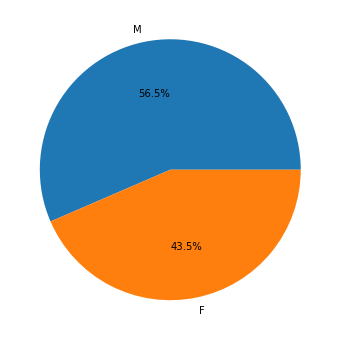

In [4]:
# All cases
plt.figure(figsize=(6,6))
plt.pie(all_xray_df['Patient Gender'].value_counts(), labels=['M', 'F'], autopct='%1.1f%%');

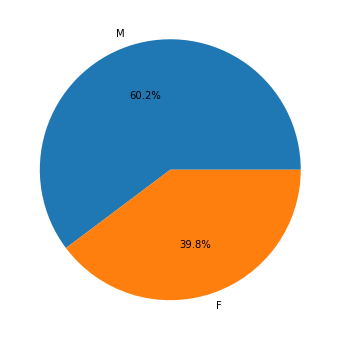

In [5]:
# Pneumonia ONLY cases
plt.figure(figsize=(6,6))
plt.pie(all_xray_df[all_xray_df['Finding Labels'] == 'Pneumonia']['Patient Gender'].value_counts(), labels=['M', 'F'], autopct='%1.1f%%');

**Gender distribution seems to be pretty equal, although there is a greater 20% difference when it comes to pneumonia only cases.**

# Age

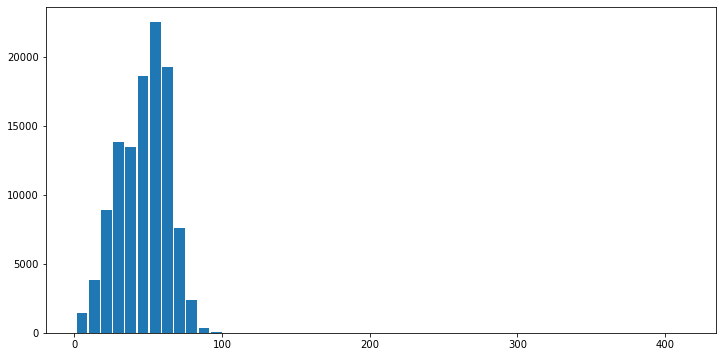

In [6]:
plt.figure(figsize=(12,6))
plt.hist(all_xray_df['Patient Age'], bins=50, rwidth=0.9);  # <== semicolon to supresses return value output when plotting

In [7]:
# patient data strangely seems to contain ages above 122
older_than_122 = all_xray_df[all_xray_df['Patient Age'] > 122]
# print(len(older_than_122))
older_than_122.sample(16)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,0.139,NaN
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,0.139,NaN
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,0.143,NaN
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,0.143,NaN
101194,00026871_000.png,No Finding,0,26871,155,F,PA,2992,2991,0.143,0.143,NaN
86264,00021275_003.png,No Finding,3,21275,413,F,AP,3056,2544,0.139,0.139,NaN
91369,00022811_000.png,No Finding,0,22811,412,M,PA,3056,2544,0.139,0.139,NaN
95794,00025206_000.png,Infiltration|Mass,0,25206,153,M,PA,2992,2991,0.143,0.143,NaN
98495,00026028_001.png,Atelectasis,1,26028,154,M,PA,2992,2991,0.143,0.143,NaN
104590,00027989_000.png,No Finding,0,27989,155,M,PA,2992,2991,0.143,0.143,NaN


In [25]:
# removing strange data points
all_xray_df = all_xray_df[all_xray_df['Patient Age'] < 122]

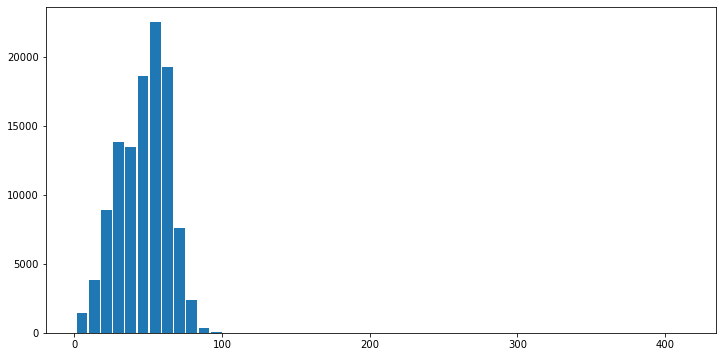

In [9]:
# AGE revisited
plt.figure(figsize=(12,6))
plt.hist(all_xray_df['Patient Age'], bins=50, rwidth=0.9);

**There were some odd numbers for patient age in 16 cases. With those removed, cases are distributed in all ages with the majority being between about 40 and 70 years.**

## Findings

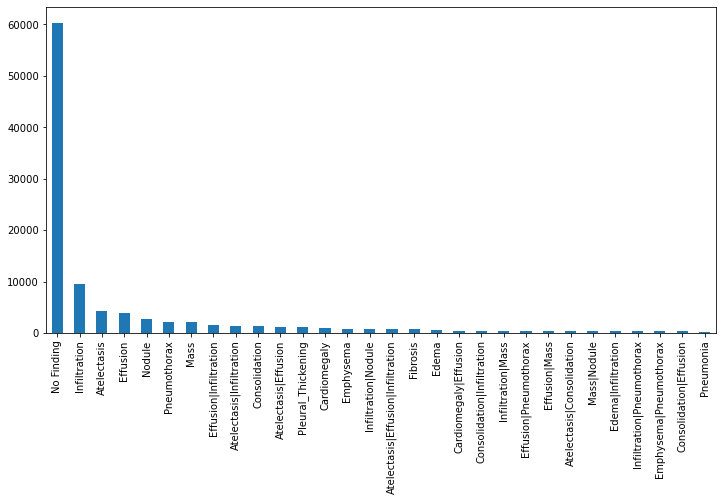

In [10]:
# FINDING LABELS
plt.figure(figsize=(12,6))
all_xray_df['Finding Labels'].value_counts()[0:30].plot(kind='bar');

In [11]:
# Splitting up labels, creating columns for each disease
labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda label: label.split('|')).tolist())))
print('Labels ({}): {}'.format(len(labels), labels))

for label in labels:
    all_xray_df[label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if label in finding else 0.0)
all_xray_df.sample(10)

Labels (15): ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Hernia' 'Infiltration' 'Mass' 'No Finding'
 'Nodule' 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
111567,00030541_005.png,Emphysema|Pneumothorax,5,30541,71,M,PA,2021,2016,0.194311,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
104703,00028042_000.png,No Finding,0,28042,41,M,PA,2992,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30056,00007833_001.png,Consolidation|Effusion,1,7833,38,M,PA,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36403,00009607_003.png,No Finding,3,9607,17,F,AP,3056,2544,0.139000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24882,00006531_001.png,Cardiomegaly,1,6531,40,F,PA,2048,2500,0.171000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8210,00002165_002.png,No Finding,2,2165,58,F,PA,2992,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62312,00015414_014.png,No Finding,14,15414,40,M,AP,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
70135,00017263_000.png,Effusion|Fibrosis,0,17263,81,F,PA,2486,2457,0.143000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38807,00010131_005.png,No Finding,5,10131,58,M,PA,2992,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60109,00014836_000.png,No Finding,0,14836,83,F,PA,2926,2953,0.143000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


All cases: 112,104
Pneumonia cases: 1,430
Other cases: 50,321
No Findings: 60,353


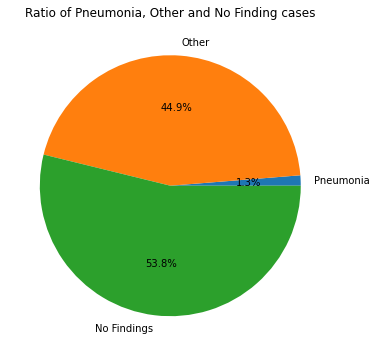

In [26]:
pneumonia_cases = len(all_xray_df[all_xray_df.Pneumonia == 1])
other_cases = len(all_xray_df[(all_xray_df.Pneumonia == 0) & (all_xray_df['No Finding'] == 0)])
no_findings = len(all_xray_df[all_xray_df['No Finding'] == 1])

print(f"All cases: {len(all_xray_df):,}")
print(f"Pneumonia cases: {pneumonia_cases:,}")
print(f"Other cases: {other_cases:,}")
print(f"No Findings: {no_findings:,}")

plt.figure(figsize=(6,6))
plt.title('Ratio of Pneumonia, Other and No Finding cases')
plt.pie([pneumonia_cases, other_cases, no_findings], labels=['Pneumonia', 'Other', 'No Findings'], autopct='%1.1f%%');

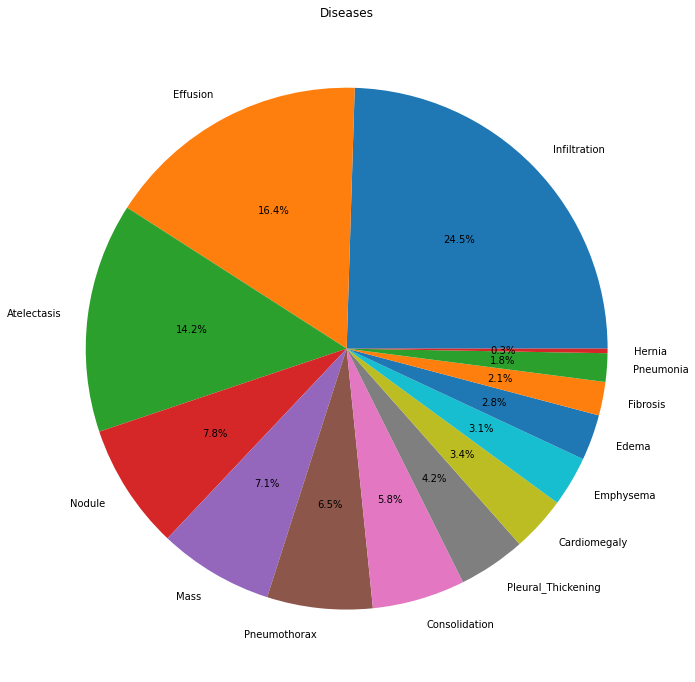

In [27]:
# diseases in dataset
diseases = pd.Series(dtype='int')
for label in labels[labels != 'No Finding']:
    diseases[label] = len(all_xray_df[all_xray_df[label] == 1])
    
diseases = diseases.sort_values(ascending=False)
plt.figure(figsize=(12,12))
plt.title('Diseases')
plt.pie(diseases, labels=diseases.index, autopct='%1.1f%%');

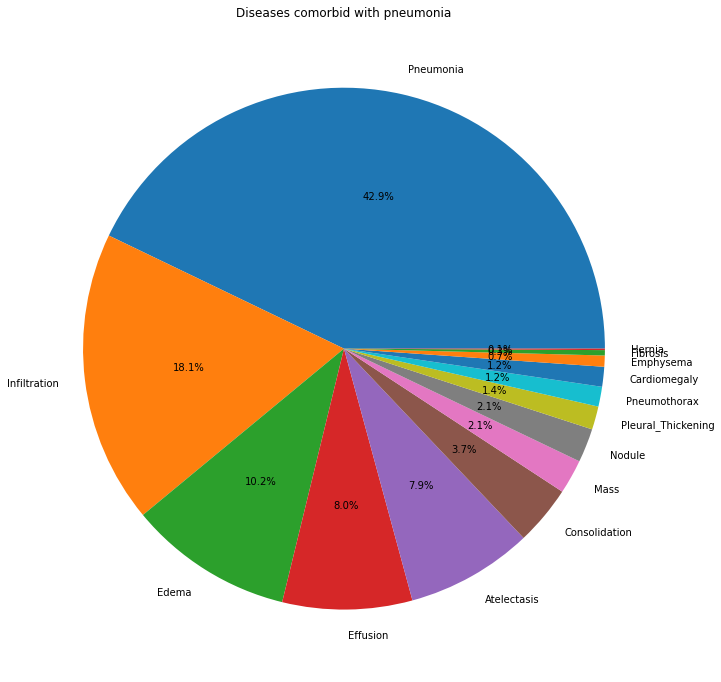

In [28]:
# diseases comorbid with pneumonia
comorbid_diseases = pd.Series(dtype='int')
for label in labels[labels != 'No Finding']:
    comorbid_diseases[label] = len(all_xray_df[(all_xray_df.Pneumonia == 1) & (all_xray_df[label] == 1)])

comorbid_diseases = comorbid_diseases.sort_values(ascending=False)
plt.figure(figsize=(12,12))
plt.title('Diseases comorbid with pneumonia')
plt.pie(comorbid_diseases, labels=comorbid_diseases.index, autopct='%1.1f%%');

**There are 15 unique finding labels in the dataset, of which No Finding is the most common with over 50% of cases. Pneumonia cases only make up 1.3%, or around 38,000 cases, while other diseases make up 45%. The most common diseases are Infiltration, Effusion and Atelectasis making up over 50%. Pneumonia occurs alone in the majority of cases, diseases comorbid with pneumonia show a slightly different mix with Infiltration, Edema and Effusion being the most common.**

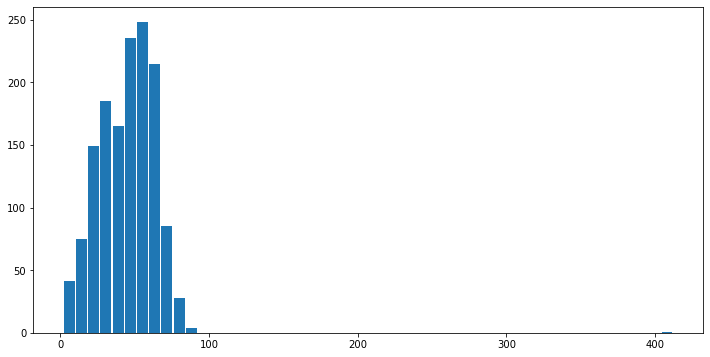

In [15]:
# AGE of pneumonia patients
plt.figure(figsize=(12,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia == 1]['Patient Age'], bins=50, rwidth=0.9);

**The distribution of ages with pneumonia patients seems to match that of all the cases.**

# Diseases per patient

In [16]:
disease_labels = np.delete(labels, np.where(labels == 'No Finding'))
for label in disease_labels:
    try:
        all_xray_df['Disease count'] = all_xray_df['Disease count'] + all_xray_df[label]
    except:
        all_xray_df['Disease count'] = all_xray_df[label]
        
all_xray_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,Disease count
12101,00003153_000.png,Effusion|Emphysema,0,3153,51,M,PA,2500,2048,0.171000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
35413,00009343_006.png,No Finding,6,9343,22,M,AP,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30372,00007917_006.png,Atelectasis|Nodule|Pneumothorax,6,7917,35,F,PA,2968,2132,0.143000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
10521,00002722_002.png,Fibrosis,2,2722,51,F,PA,1904,2021,0.194311,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83558,00020505_000.png,Infiltration,0,20505,52,M,PA,2990,2989,0.143000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64209,00015843_003.png,Consolidation|Nodule,3,15843,57,M,AP,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
83675,00020524_029.png,No Finding,29,20524,48,F,PA,3036,2544,0.139000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28575,00007452_001.png,No Finding,1,7452,60,M,AP,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
624,00000154_000.png,Infiltration,0,154,54,F,PA,2992,2991,0.143000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7831,00002058_001.png,Nodule,1,2058,62,M,PA,2021,2021,0.194311,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


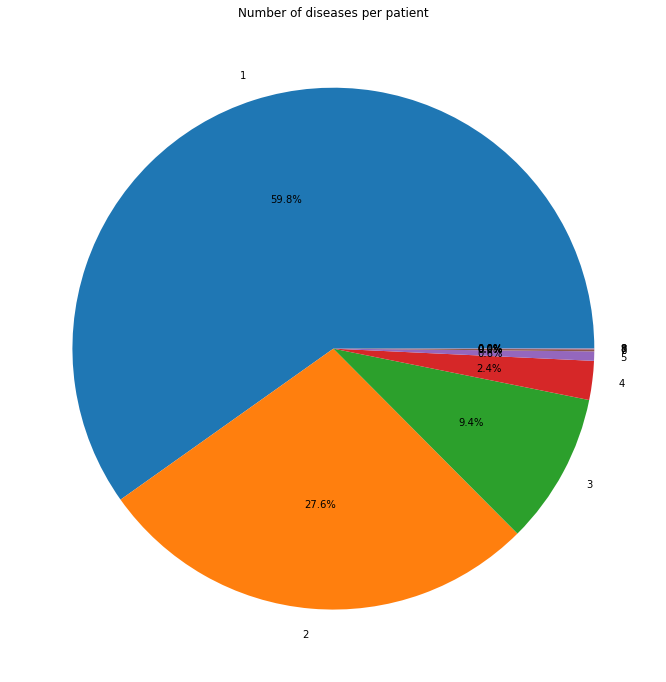

In [17]:
patient_diseases = all_xray_df[all_xray_df['Disease count'] > 0.0]['Disease count'].value_counts()
patient_disease_values = patient_diseases.array
patient_disease_labels = [int(i) for i in patient_diseases.index]

plt.figure(figsize=(12,12))
# all_xray_df['Disease count'].value_counts()
# all_xray_df['Disease count'].value_counts().plot(kind='bar');
plt.title('Number of diseases per patient')
plt.pie(patient_disease_values, labels = patient_disease_labels, autopct='%1.1f%%');

# Position

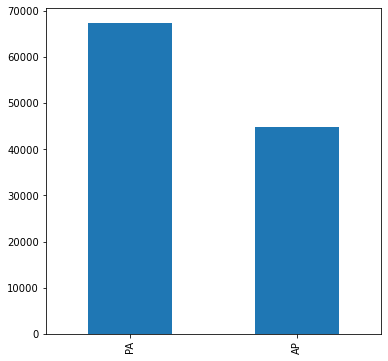

In [18]:
plt.figure(figsize=(6,6))
all_xray_df['View Position'].value_counts().plot(kind='bar');

# Images

In [19]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths))
sample_df['path'] = sample_df['Image Index'].map(all_image_paths.get)
sample_df.sample(3)

Scans found: 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,path
1687,00008777_002.png,Effusion,2,8777,067Y,M,PA,2500,2048,0.168000,0.168000,/data/images_004/images/00008777_002.png
4461,00022208_005.png,Nodule,5,22208,050Y,M,PA,2992,2991,0.143000,0.143000,/data/images_010/images/00022208_005.png
5436,00029533_000.png,No Finding,0,29533,067Y,F,PA,2021,2021,0.194311,0.194311,/data/images_012/images/00029533_000.png


In [20]:
def get_normalized_img(img):
    mean = np.mean(img)
    std = np.std(img)
    normalized = img.copy()
    return (normalized - mean)/std
    

def show_sample(finding):
    samples = np.array(sample_df[sample_df['Finding Labels'] == finding]['path'])
    img0 = plt.imread(samples[0])
    img0_norm = get_normalized_img(img0)
    img1 = plt.imread(samples[1])
    img1_norm = get_normalized_img(img1)

    fig = plt.figure(figsize=(12,12))
    
    fig.add_subplot(221)
    plt.title(finding + ' sample')
    plt.imshow(img0, cmap='gray');
    
    fig.add_subplot(222)
    plt.title('histogram')
    plt.hist(img0_norm.ravel(), bins = 256);
    
    fig.add_subplot(223)
    plt.title(finding + ' sample')
    plt.imshow(img1, cmap='gray');
    
    fig.add_subplot(224)
    plt.title('histogram')
    plt.hist(img1_norm.ravel(), bins = 256);

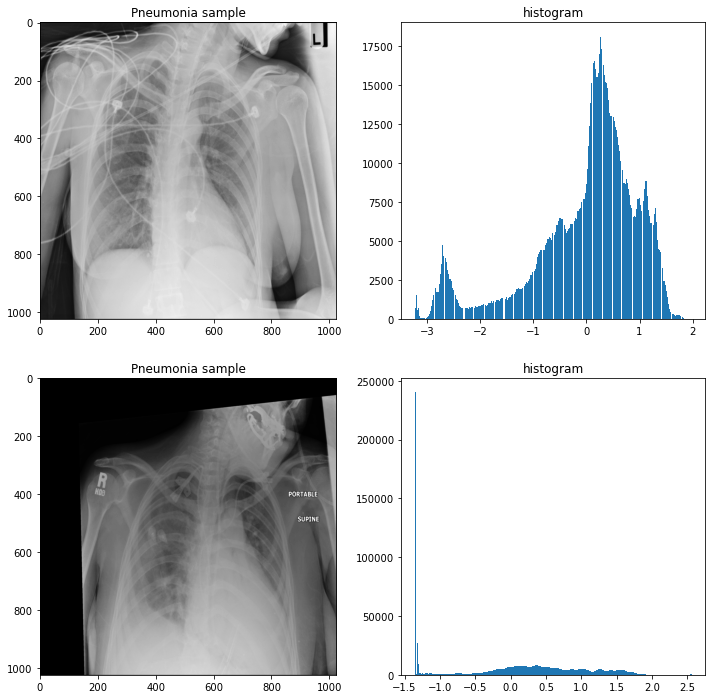

In [21]:
show_sample('Pneumonia')

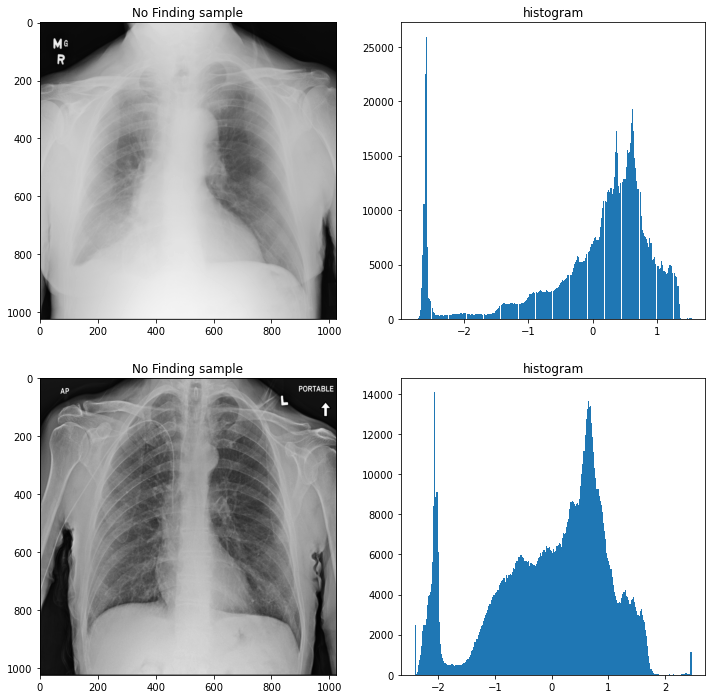

In [22]:
show_sample('No Finding')

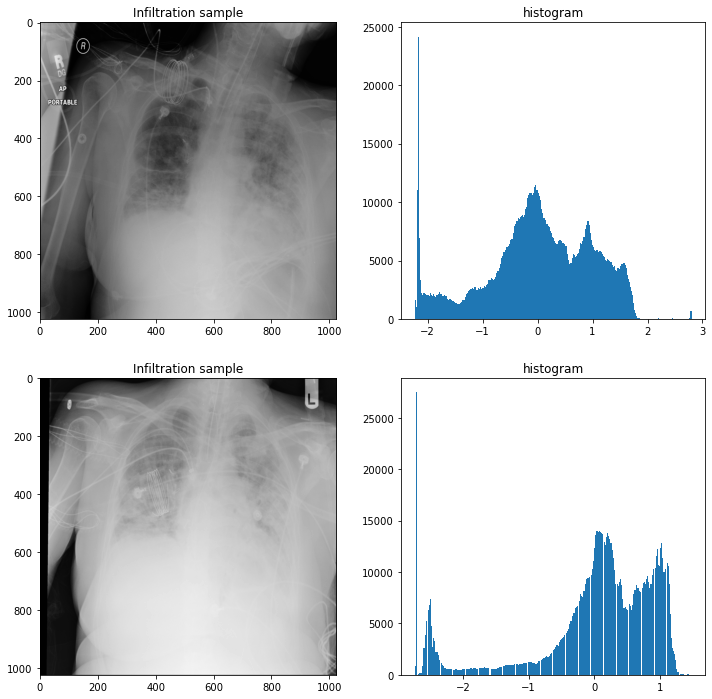

In [23]:
show_sample('Infiltration')

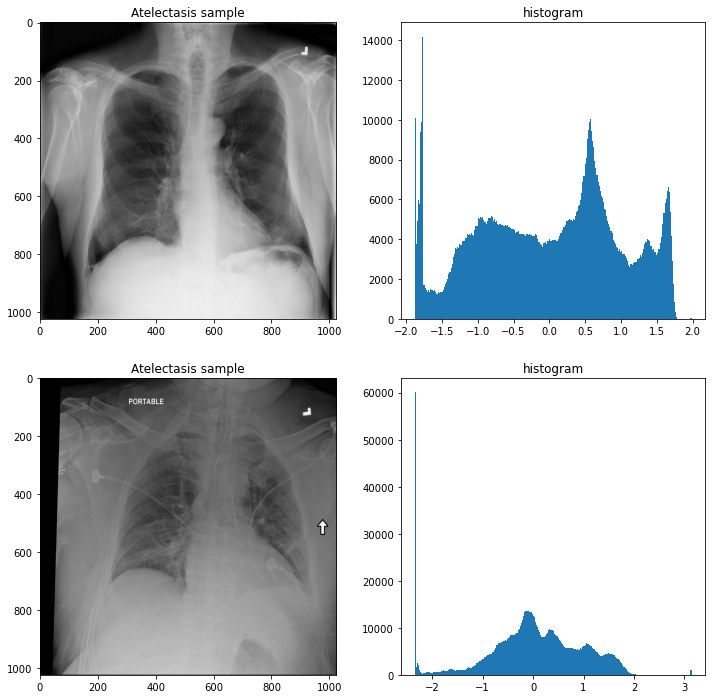

In [24]:
show_sample('Atelectasis')

I honestly have trouble comparing the intensity from these histograms. I would expect an algorithm to be much better at detecting patterns in this kind of data.